## Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller


We are considering the Air-Passengers overtime 

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


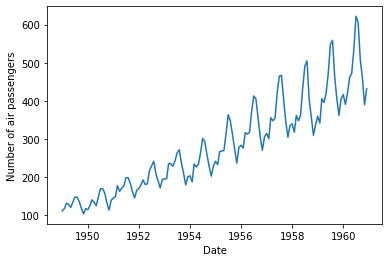

In [3]:
file_name = "AirPassengers.csv"
df = pd.read_csv(file_name, parse_dates = ['Month'], index_col = ['Month'])
display(df.head())
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)

Explain seasonality, cyclicity, trend, noise?
> Seasonality - is fixed and for a known time and influcenced by seasonal factors like, festivals, seasons etc.<br>
> Cyclicity - is not fixed, Give an example<br>
> Trend - It is the long term pattern or we can consider the over all pattern, uneffected by calendar year, <br>
> Noise - has zero mean and finite variance, or we can say the error terms or uncorrealted variables<br>

decompostion of data


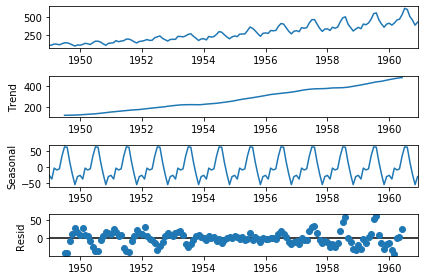

In [4]:
decomposition = seasonal_decompose(df) 

print("decompostion of data")
display(decomposition)
decomposition.plot()
plt.show()

## the first plot is observed. 

In [5]:
print("\n residuals")
display(decomposition.resid[0:10])
## why are the furst six empty 
print("\n seasonal")

display(decomposition.seasonal[0:3])
print("\n trend")

display(decomposition.trend[2:10])


 residuals


Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
Name: resid, dtype: float64


 seasonal


Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
Name: seasonal, dtype: float64


 trend


Month
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: trend, dtype: float64

ETS( error trend seasonal) - can be categorised based on these aspects. 

No-Trend, No-Seasonal - use simple exponential smoothening. 
<br>No-Trend, Seasonal-Constant
<br>No-Trend, Seasonal-Increasing
<br>Trend-Linear,No-Seasonal
<br>Trend-Linear,Seasonal-Constant
<br>Trend-Linear,Seasonal-Increasing
<br>Trend-Exponential,No-Seasonal
<br>Trend-Exponential,Seasonal-Constant
<br>Trend-Exponential,Seasonal-Increasing

ACF, is on the postive side, we are not differenting it meaning, meaning the time-series is not stationary. Also there is a seasonal/cyclic components at lag 12. 

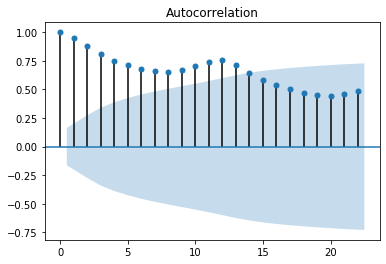

In [6]:
plot_acf(df)
plt.show()


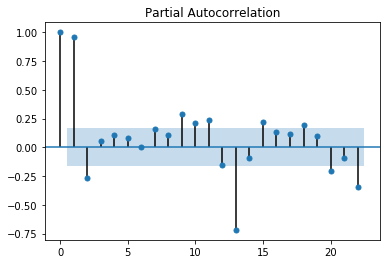

In [7]:
plot_pacf(df)
plt.show()

Ad-fuller test of stationarity :- It is evident that the series is not stationary as ADF statistic is not below, the Critical Value of 5% i.e. -2.88. <Br>
Stationary is an important assumption, is TS modelling,(constant mean and variance.)

In [8]:
result = adfuller(df['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

print("\nOverall result " ,result)

ADF Statistic: 0.8153688792060433
p-value: 0.9918802434376409
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598

Overall result  (0.8153688792060433, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


,#Passengers
Month,
1950-03-01,29.0
1950-04-01,17.0
1950-05-01,-7.0


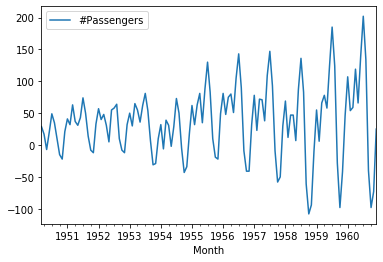

In [9]:
df_diff = df.diff(14).dropna()
display(df_diff.head(3))

df_diff.plot()
plt.show()

In [10]:
result = adfuller(df_diff['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

print("\nOverall result " ,result)

ADF Statistic: -4.212923380804504
p-value: 0.0006264851621313893
Critical Values:
	1%: -3.4880216384691867
	5%: -2.8867966864160075
	10%: -2.5802408234244947

Overall result  (-4.212923380804504, 0.0006264851621313893, 13, 116, {'1%': -3.4880216384691867, '5%': -2.8867966864160075, '10%': -2.5802408234244947}, 939.1142610223587)


The series is stationary, as 5% critical value has been achieved. 

Basic ideas on time series :<br>
1. linear models should not be auto regressive
2. AR assumes that past values have an effect on the present ones
3. Moving averages presumes that todays dependant variable is dependant on previous error values. 
4. In ARIMA
>1. p - autoregressive term
>2. d - # of non seasonal differences
>3. q - moving averages

##### AR models 

$$ y_t = a_1 * y_{t-1} + \epsilon_t $$

>epsoln is the shock term, it is white noise and each point is indenpendant.
>The point is dependant on the previous point 
> This is the first order AR model 

> AR(p) where p = 2
$$ y_t = a_1 * y_{t-1} + a_2 * y_{t-2} +\epsilon_t $$

##### MA models
> This is where the current value is regressed against the previous error term/white noise
$$ y_t = a_1 * \epsilon_{t-1} + \epsilon_t $$

> 

##### ARMA models
> a combination of AR where it is regressed againt the previous term and MR where it is regressed against the \epsilon term. 

$$y_t = a_1 * y_{t-1} + m_1 * \epsilon_{t-1} + \epsilon_t $$

> ARMA is defined by p,q <br>
> p is the order of AR   # of auto-regressive lags<br>
> d is the order of MR   # of moving average lags<br>

> Lets say we want to create a arma series using p = 0.5 and q = 0.2
> 
$$y_t = 0.5 * y_{t-1} + 0.2 * \epsilon_{t-1} + \epsilon_t $$

How to handle if a time series is slightly under or over differenced ?

>It may so happen that your series is slightly under differenced, that differencing it one more time makes it slightly over-differenced.

>How to handle this case?

>If your series is slightly under differenced, adding one or more additional AR terms usually makes it up. Likewise, if it is slightly over-differenced, try adding an additional MA term.

Next Steps

In [ ]:
!pip install pyramid-arima

In [32]:

model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
model.get_params()

ModuleNotFoundError: No module named 'pyramid'